In [1]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 37.0MB/s 
     |████████████████████████████████| 3.9MB 60.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=60685c6783a26ae8b5067a9b5a0b5425061ed725b6b62e136784899e320f7a26
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Fo

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [0]:
# network and training
EPOCHS = 60
BATCH_SIZE = 256
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.35

In [0]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

In [0]:
def build(input_shape, classes):
  model = models.Sequential()
  # CONV => RELU => POOL
  model.add(layers.Convolution2D(20, (5, 5), activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  # Flatten => RELU layers
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  # a softmax classifier
  model.add(layers.Dense(classes, activation="softmax"))
  return model

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [0]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [0]:
model = build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               400500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

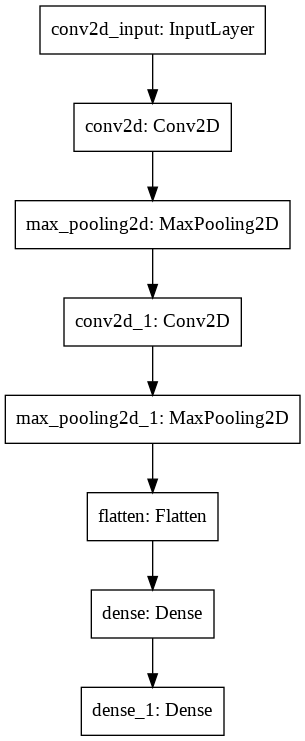

In [16]:
tf.keras.utils.plot_model(model)

In [0]:
callbacks = [
     # Write TensorBoard logs to './logs' directory
     tf.keras.callbacks.TensorBoard(log_dir='./logs')
     ]

In [35]:
history = model.fit(X_train, y_train,
                     batch_size=BATCH_SIZE, epochs=EPOCHS,
                     verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
                     callbacks=callbacks)

Train on 39000 samples, validate on 21000 samples
Epoch 1/60
39000/39000 [==============================] - 2s 42us/sample - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0440 - val_accuracy: 0.9882
Epoch 2/60
39000/39000 [==============================] - 2s 39us/sample - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0384 - val_accuracy: 0.9894
Epoch 3/60
39000/39000 [==============================] - 2s 39us/sample - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0467 - val_accuracy: 0.9889
Epoch 4/60
39000/39000 [==============================] - 2s 39us/sample - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0446 - val_accuracy: 0.9906
Epoch 5/60
39000/39000 [==============================] - 2s 39us/sample - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0444 - val_accuracy: 0.9904
Epoch 6/60
39000/39000 [==============================] - 2s 40us/sample - loss: 6.4812e-04 - accuracy: 0.9998 - val_loss: 0.0483 - val_accuracy: 0.9905
Epoch 7/60
39000/39000 [============================

In [40]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0462 - accuracy: 0.9929


In [37]:
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


Test score: 0.046185207780389606
Test accuracy: 0.9929


In [38]:
score = model.evaluate(X_train, y_train, verbose=VERBOSE)

60000/60000 [==============================] - 4s 69us/sample - loss: 0.0251 - accuracy: 0.9968
